The cfl value is 60.839999999999996
The cfl value is 0.006084
The cfl value is 0.00038025
The cfl value is 60.839999999999996
The cfl value is 0.006084
The cfl value is 0.00038025


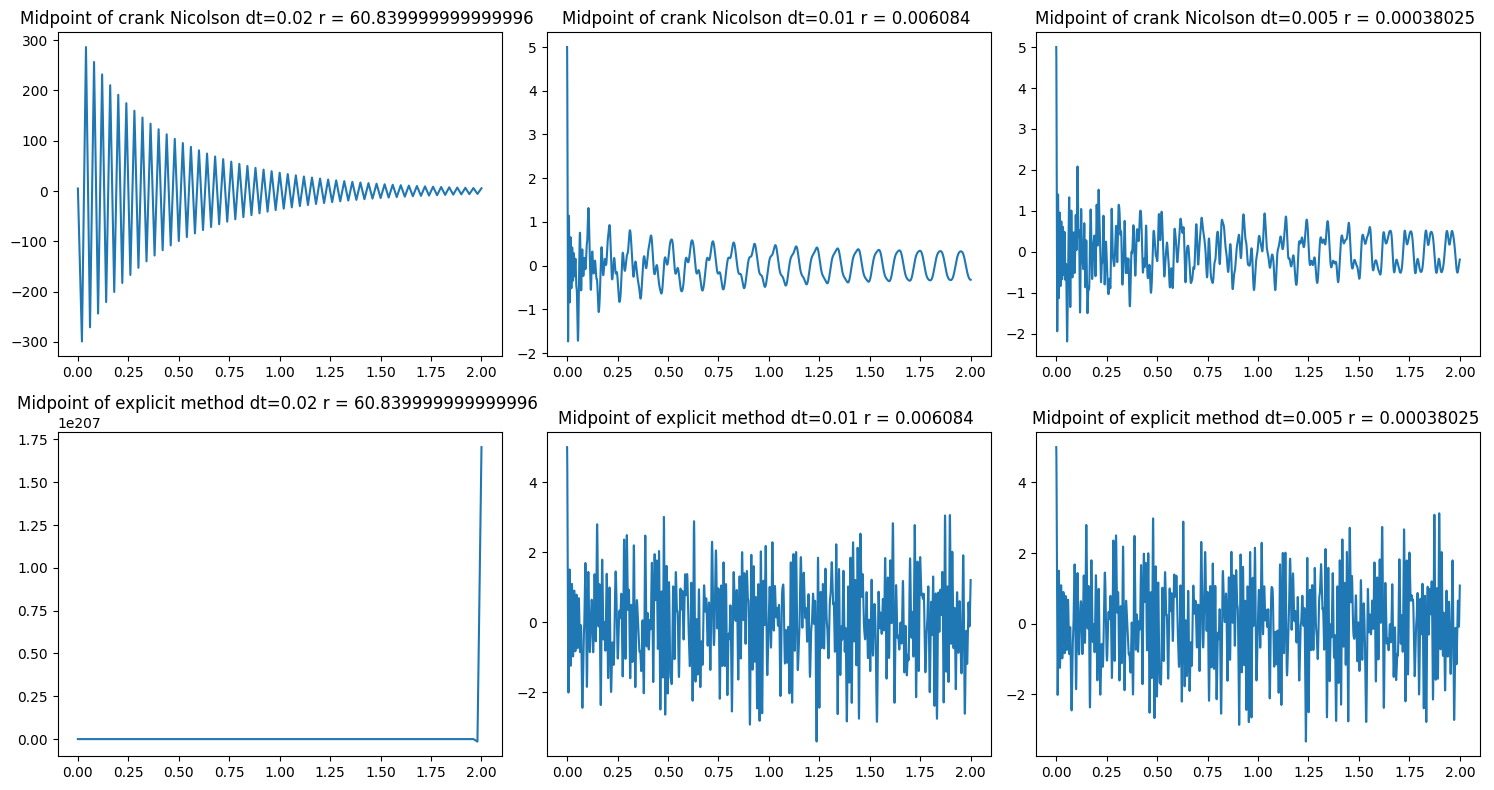

/var/folders/nh/d6mbhcsn0bv2bd2bq4cj0vh40000gn/T/ipykernel_18792/729761216.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


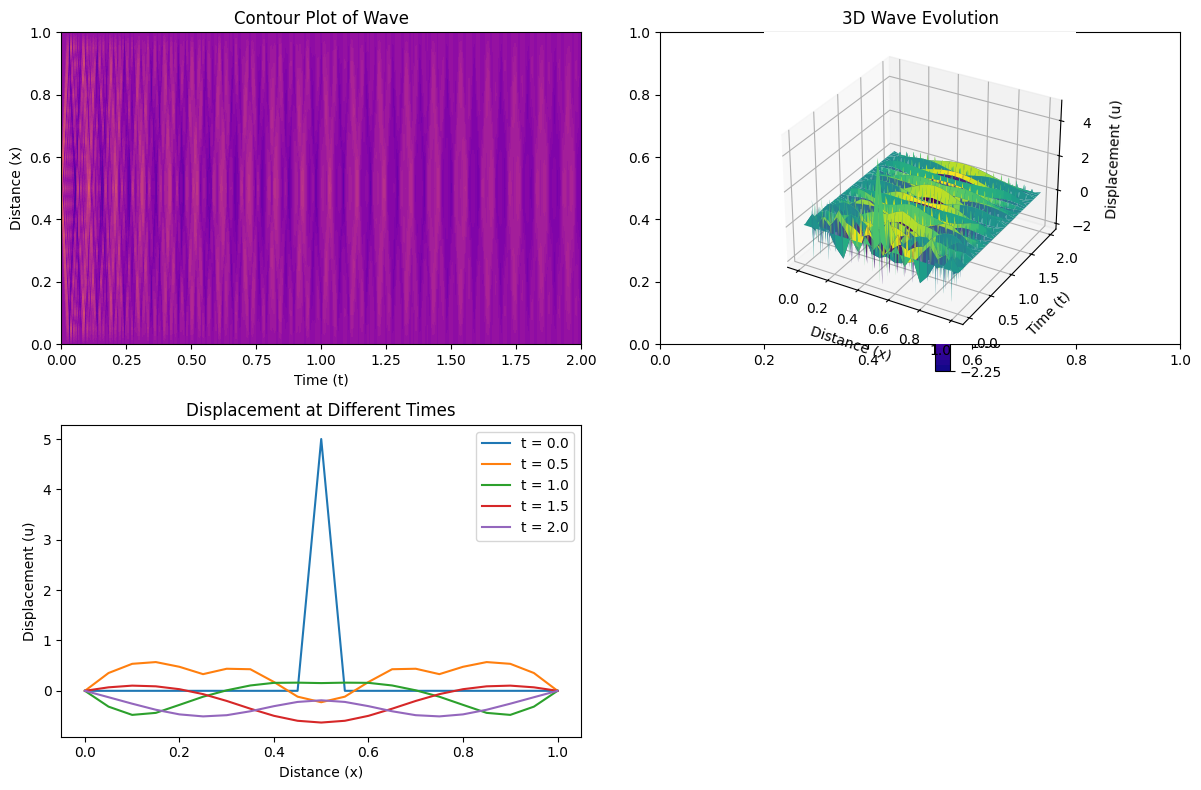

CW done: I deserve a good mark


In [22]:
### - - - - - - - In this section I am importing all the libraries I will need- - - - - - - - -###
import numpy as np
import matplotlib.pyplot as plt

# defining the implicit method for solving wave equation
def crank_nicolson_wave(insect, L=1.0, dx=10, T=2.0, dt=11,  ) :
    c=19.5 #speed of wave
    depth =insect.displacement #initial displacement of insect
    width = insect.width #width of insect
    Nx = int(L/dx +1 ) # Number of nodes in x
    Nt = int(T/dt +1 )  # Number of nodes in time

    r = (c * dt / dx) ** 2  # CFL condition
    print(f'The cfl value is {r}')

### - - - - - - - In this section I am setting the domain of solution and the discretised grid- - - - - - - - -###
    t= np.linspace(0, T, Nt)  # Time domain
    x = np.linspace(0, L, Nx)  # Length of wave domain
    u = np.zeros((Nx, Nt))  # Solution matrix
    
### - - - - - - - In this section I am defining arrays I would need (if neeeded)- - - - - - - - -###

    # Solving for each time, setting up tridiag matrix
    A = np.zeros((Nx-2, Nx-2))  #Init matrix excluding BC
    np.fill_diagonal(A, (1+r))  #Fill Main diag
    np.fill_diagonal(A[:-1, 1:], -r/2)  #Fill upper and lower diag
    np.fill_diagonal(A[1:, :-1], -r/2)  

    # b is RHS matrix for non BC, calulated from previous time steps
    b = np.zeros(Nx-2)

### - - - - - - - In this section I am setting the boundary conditions/initial values- - - - - - - - -###

    # Set Gaussian pulse initial conditions
    u[:, 0] = depth * np.exp(-((x - L/2) ** 2) / (2 * width ** 2))
    u[0, :] = 0  # Left boundary condition
    u[-1, :] = 0  # Right boundary condition
    
    # First time step using  explicit approach setting g(x) to 0 as no initial speed
    u[1:-1, 1] = u[1:-1, 0] + (r / 2) * (u[:-2, 0] - 2 * u[1:-1, 0] + u[2:, 0])
    
### - - - - - - - In this section I am implementing the numerical method- - - - - - - - -###
    
    # Time stepping
    for j in range(1, Nt - 1):

        #b iniitial and final values are different to bc
        b[0]= r/2 * u[0,j+1] + r/2*(u[2,j]+u[0,j]) + (2-r)*(u[1,j])-u[1,j-1]
        b[Nx-3]= r/2 * u[Nx-1,j+1] + r/2*(u[Nx-3,j]+u[Nx-1,j]) + (2-r)*(u[Nx-2,j])-u[Nx-2,j-1]

        #b values for the rest of the matrix
        for i in range(1,Nx-3):
            b[i]= r/2*(u[i+2,j]+u[i,j]) + (2-r)*(u[i+1,j])-u[i+1,j-1]
        
        
        # Solve tridiagonal system for u at time n
        u[1:-1, j+1] = np.linalg.solve(A, b)


    return u,r,t
#Defining the explicit method for solving wave equation
def explicit_wave_method(insect, L=1.0, dx=10, T=2.0, dt=11,  ) :
    c=19.5 #speed of wave
    depth =insect.displacement #initial displacement of insect
    width = insect.width #width of insect

    Nx = int(L/dx +1 ) # Number of nodes in x
    Nt = int(T/dt +1 )  # Number of nodes in time
    r = (c * dt / dx) ** 2  # CFL condition
    print(f'The cfl value is {r}')

### - - - - - - - In this section I am setting the domain of solution and the discretised grid- - - - - - - - -###
    t= np.linspace(0, T, Nt)  # Time domain
    x = np.linspace(0, L, Nx)  # Length of wave domain
    u = np.zeros((Nx, Nt))  # Solution matrix
    
### - - - - - - - In this section I am setting the boundary conditions/initial values- - - - - - - - -###
    
    # Set Gaussian pulse initial conditions
    u[:, 0] = depth * np.exp(-((x - L/2) ** 2) / (2 * width ** 2))
    u[0, :] = 0  # Left boundary condition
    u[-1, :] = 0  # Right boundary condition

### - - - - - - - In this section I am implementing the numerical methods- - - - - - - - -###

    # First time step using  explicit approach setting g(x) to 0 as no initial speed
    u[1:-1, 1] = u[1:-1, 0] + (r / 2) * (u[:-2, 0] - 2 * u[1:-1, 0] + u[2:, 0])

    # Time stepping loop, simplified as r = 1 
    for j in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            u[i, j+1] =  (r / 2) * (u[i+1, j] - 2 * u[i, j] + u[i-1, j])+2*u[i, j] - u[i, j-1]
    return u,r,t



# These waves will be demonstrated using different insects hitting a spider web in a 1D domain.
Tension = 0.1*10**-3 #Tension of spiders web
class Insect:
    def __init__(self,weight, width, speed) -> None:
        self.width = width
        self.weight = weight
        self.speed = speed
        self.displacement=self.displacement()

    # Defining how much insect will displace web until velocity is 0
    def displacement(self):
        s = self.speed**2/(2*(Tension/self.weight)) #Using SUVAT
        return s
    

#Init insects
bumblebee = Insect(0.1,0.01,0.1)
dragonfly = Insect(0.01,0.005,0.2)

#Obtaining results for varying number of  time nodes
CN_dT_02,r_02,t_02 =crank_nicolson_wave(insect = bumblebee, L=1.0, dx=0.05, T=2.0, dt=0.02,  )
CN_dT_01,r_01,t_01 =crank_nicolson_wave(insect = bumblebee, L=1.0, dx=0.05, T=2.0, dt=0.0002,  )
CN_dT_005, r_005,t_005 =crank_nicolson_wave(insect = bumblebee, L=1.0, dx=0.05, T=2.0, dt=0.00005,  )
EXPLICIT_dt_02,r_02,t_02 =explicit_wave_method(insect = bumblebee, L=1.0, dx=0.05, T=2.0, dt=0.02,  )
EXPLICIT_dt_01,r_01,t_01  =explicit_wave_method(insect = bumblebee, L=1.0, dx=0.05, T=2.0, dt=0.0002,  )
EXPLICIT_dt_005,r_005,t_005 =explicit_wave_method(insect = bumblebee, L=1.0, dx=0.05, T=2.0, dt=0.00005,  )

### - - - - - - - In this section I am showing the results - - - - - - - - -###
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Plot the data in each subplot
axs[0, 0].plot(t_02, CN_dT_02[10])
axs[0, 0].set_title(f'Midpoint of crank Nicolson dt=0.02 r = {r_02} ')

axs[0, 1].plot(t_01, CN_dT_01[10])
axs[0, 1].set_title(f'Midpoint of crank Nicolson dt=0.01 r = {r_01} ')

axs[0, 2].plot(t_005, CN_dT_005[10])
axs[0, 2].set_title(f'Midpoint of crank Nicolson dt=0.005 r = {r_005} ')

axs[1, 0].plot(t_02, EXPLICIT_dt_02[10])
axs[1, 0].set_title(f'Midpoint of explicit method dt=0.02 r = {r_02} ')

axs[1, 1].plot(t_01, EXPLICIT_dt_01[10])
axs[1, 1].set_title(f'Midpoint of explicit method dt=0.01 r = {r_01} ')

axs[1, 2].plot(t_005, EXPLICIT_dt_005[10])
axs[1, 2].set_title(f'Midpoint of explicit method dt=0.005 r = {r_005} ')

# Plotting different time nodes subplots
plt.tight_layout()
plt.show()

#Using 3 different methods to plot the implicit wave


Nx=CN_dT_005.shape[0]
Nt=CN_dT_005.shape[1]
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 
t= np.linspace(0, 2, Nt)  # Time domain
x = np.linspace(0, 1, Nx) #Length of wave

# --- 1. Heatmap ---
contour = axs[0,0].contourf(t, x, CN_dT_005, levels=50, cmap="plasma")
fig.colorbar(contour, ax=axs[0])
axs[0,0].set_title("Contour Plot of Wave")
axs[0,0].set_xlabel("Time (t)")
axs[0,0].set_ylabel("Distance (x)")

# --- 2. Surface Plot ---
ax3d = fig.add_subplot(2, 2, 2, projection='3d')  # 3D plot needs separate add_subplot
X,T = np.meshgrid(x, t)
ax3d.plot_surface(X, T, CN_dT_005.T, cmap='viridis')
ax3d.set_title("3D Wave Evolution")
ax3d.set_xlabel("Distance (x)")
ax3d.set_ylabel("Time (t)")
ax3d.set_zlabel("Displacement (u)")

# --- 3. Line Plots ---
time_steps = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]  # Pick time slices
for time in time_steps:
    axs[1, 0].plot(x, CN_dT_005[:, time], label=f"t = {t[time]}")
axs[1, 0].set_title("Displacement at Different Times")
axs[1, 0].set_xlabel("Distance (x)")
axs[1, 0].set_ylabel("Displacement (u)")
axs[1, 0].legend()

# Remove empty subplot (bottom-right)
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()



# In this section I am celebrating
print('CW done: I deserve a good mark')

